<a href="https://colab.research.google.com/github/Tech-Gene/Nobel-Laurete/blob/main/Subject_1_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction section



This is a run down step by step code of data processing electromyography database and a Principal component analysis PCA visualization.

The NinaPro Database contains a data of 27 subjects who performed 52 hand movements of per subject. http://ninapro.hevs.ch/data1     contains the Matlab file and compressed zip file of the 27 subjects

Objective

This code is currently focused to perform a data processing, filtering and PCA of electromyography data of 27 subjects.
As a data scientist, I am tasked with processing, filtering and performing PCA visualization of the data identifying the patterns and .

Variables

Stimulus: label of each postures or movement performance by the subjects (52 postures per subject)

Restimulus: copy of label of each postures or movement carried out by the subject "same as stimulus"
Repetition: number of repetitions per stimulus carried out

Electrode 1-10: data of captured signals by ninapro device.

# Data and library import section

Import basic data processing function

In [ ]:
import pandas as pd
import numpy as np

Code to authorise google Colab to gain access to drive files

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Access to specific data file Subject 1 exercise 1,2 and 3

In [ ]:
link= 'https://drive.google.com/file/d/1keXufVU7FW7pMpAXFVke3ihIUNnTii0o/view?usp=drivesdk'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('S1_A1_E1.csv')

df1 = pd.read_csv('S1_A1_E1.csv')
print(df1)

        Stimulus  Restimulus  Repetition  Rerepetition  Electrode 1  \
0              0           0           0             0       0.0684   
1              0           0           0             0       0.0586   
2              0           0           0             0       0.0562   
3              0           0           0             0       0.0562   
4              0           0           0             0       0.0488   
...          ...         ...         ...           ...          ...   
101009         0           0           0             0       0.0024   
101010         0           0           0             0       0.0024   
101011         0           0           0             0       0.0024   
101012         0           0           0             0       0.0024   
101013         0           0           0             0       0.0024   

        Electrode 2  Electrode 3  Electrode 4  Electrode 5  Electrode 6  \
0            0.0024       0.0024       0.0024       0.0024       0.0098 

In [ ]:

link= 'https://drive.google.com/file/d/1kfLXvked2YLe1Z3EF1TpsHNm98bXD6aV/view?usp=drivesdk'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('S1_A1_E2.csv')

df = pd.read_csv('S1_A1_E2.csv')
print(df)

        Stimulus  Restimulus  Repetition  Rerepetition  Electrode 1  \
0              0           0           0             0       0.0024   
1              0           0           0             0       0.0024   
2              0           0           0             0       0.0024   
3              0           0           0             0       0.0195   
4              0           0           0             0       0.0293   
...          ...         ...         ...           ...          ...   
142971         0           0           0             0       0.0293   
142972         0           0           0             0       0.0293   
142973         0           0           0             0       0.0220   
142974         0           0           0             0       0.0342   
142975         0           0           0             0       0.0415   

        Electrode 2  Electrode 3  Electrode 4  Electrode 5  Electrode 6  \
0            0.0024       0.0024       0.0024       0.0024       0.0024 

In [ ]:
link= 'https://drive.google.com/file/d/1jIYNUN0rXE1vnC9X3mEMwpsaCZMzctJG/view?usp=drivesdk'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('S1_A1_E3.csv')

df2 = pd.read_csv('S1_A1_E3.csv')
print(df2)

        Stimulus  Restimulus  Repetition  Rerepetition  Electrode 1  \
0              0           0           0             0       0.0024   
1              0           0           0             0       0.0024   
2              0           0           0             0       0.0024   
3              0           0           0             0       0.0024   
4              0           0           0             0       0.0024   
...          ...         ...         ...           ...          ...   
227488         0           0           0             0       0.0024   
227489         0           0           0             0       0.0024   
227490         0           0           0             0       0.0024   
227491         0           0           0             0       0.0024   
227492         0           0           0             0       0.0024   

        Electrode 2  Electrode 3  Electrode 4  Electrode 5  Electrode 6  \
0            0.0024       0.0024       0.0024       0.0024       0.0024 

# Data Processing Section

Checking the data types of each column in the data

In [ ]:
df.dtypes

Stimulus          int64
Restimulus        int64
Repetition        int64
Rerepetition      int64
Electrode 1     float64
Electrode 2     float64
Electrode 3     float64
Electrode 4     float64
Electrode 5     float64
Electrode 6     float64
Electrode 7     float64
Electrode 8     float64
Electrode 9     float64
Electrode 10    float64
dtype: object

In [ ]:
df1.dtypes

Stimulus          int64
Restimulus        int64
Repetition        int64
Rerepetition      int64
Electrode 1     float64
Electrode 2     float64
Electrode 3     float64
Electrode 4     float64
Electrode 5     float64
Electrode 6     float64
Electrode 7     float64
Electrode 8     float64
Electrode 9     float64
Electrode 10    float64
dtype: object

In [ ]:
df2.dtypes

Stimulus          int64
Restimulus        int64
Repetition        int64
Rerepetition      int64
Electrode 1     float64
Electrode 2     float64
Electrode 3     float64
Electrode 4     float64
Electrode 5     float64
Electrode 6     float64
Electrode 7     float64
Electrode 8     float64
Electrode 9     float64
Electrode 10    float64
dtype: object

Changing the data types of Stimulus and Repetition column from integer to string types

In [ ]:
df['Stimulus']= df['Stimulus'].apply(str)

df['Repetition']= df['Repetition']. map(str)
df.dtypes

Stimulus         object
Restimulus        int64
Repetition       object
Rerepetition      int64
Electrode 1     float64
Electrode 2     float64
Electrode 3     float64
Electrode 4     float64
Electrode 5     float64
Electrode 6     float64
Electrode 7     float64
Electrode 8     float64
Electrode 9     float64
Electrode 10    float64
dtype: object

In [ ]:
df1['Stimulus']= df1['Stimulus'].apply(str)

df1['Repetition']= df1['Repetition']. map(str)
df1.dtypes

Stimulus         object
Restimulus        int64
Repetition       object
Rerepetition      int64
Electrode 1     float64
Electrode 2     float64
Electrode 3     float64
Electrode 4     float64
Electrode 5     float64
Electrode 6     float64
Electrode 7     float64
Electrode 8     float64
Electrode 9     float64
Electrode 10    float64
dtype: object

In [ ]:
df2['Stimulus']= df2['Stimulus'].apply(str)

df2['Repetition']= df2['Repetition']. map(str)
df2.dtypes

Stimulus         object
Restimulus        int64
Repetition       object
Rerepetition      int64
Electrode 1     float64
Electrode 2     float64
Electrode 3     float64
Electrode 4     float64
Electrode 5     float64
Electrode 6     float64
Electrode 7     float64
Electrode 8     float64
Electrode 9     float64
Electrode 10    float64
dtype: object

Performing the data filtering by using the group by and mean function to filter several repetited rows in the electrode columns and get a transformed data.

In [ ]:
n= df.groupby(["Stimulus","Repetition"])["Electrode 1","Electrode 2","Electrode 3","Electrode 4","Electrode 5","Electrode 6","Electrode 7","Electrode 8","Electrode 9","Electrode 10"].mean()
n

<ipython-input-14-ff2d5a32b223>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  n= df.groupby(["Stimulus","Repetition"])["Electrode 1","Electrode 2","Electrode 3","Electrode 4","Electrode 5","Electrode 6","Electrode 7","Electrode 8","Electrode 9","Electrode 10"].mean()


Electrode 1  Electrode 2  Electrode 3  Electrode 4  \
Stimulus Repetition                                                       
0        0              0.026095     0.002750     0.003499     0.002656   
1        1              0.617650     0.413306     0.183976     0.075554   
         10             0.349446     0.218633     0.047308     0.012547   
         2              0.606712     0.517093     0.223368     0.072102   
         3              0.431615     0.321153     0.067033     0.020017   
...                          ...          ...          ...          ...   
9        5              0.298916     0.210920     0.073043     0.077411   
         6              0.283064     0.272777     0.053904     0.056373   
         7              0.221273     0.172830     0.042598     0.032845   
         8              0.242405     0.180568     0.046259     0.043599   
         9              0.269757     0.201855     0.041787     0.043912   

                     Electrode 5  Electrode 6  Electrode 7  Electrode 8  \
Stimulus Repetition                                                       
0        0              0.002513     0.002490     0.038226     0.082723   
1        1              0.035564     0.031773     0.493224     0.525864   
         10             0.004079     0.002601     0.079553     0.334610   
         2              0.034410     0.020201     0.304389     0.950493   
         3              0.009383     0.007444     0.238973     0.373625   
...                          ...          ...          ...          ...   
9        5              0.037601     0.024211     0.131475     0.373684   
         6              0.035375     0.025051     0.120285     0.384710   
         7              0.016762     0.013615     0.104293     0.311770   
         8              0.028086     0.019245     0.119310     0.341032   
         9              0.025319     0.018003     0.109771     0.319592   

                     Electrode 9  Electrode 10  
Stimulus Repetition                             
0        0              0.003285      0.034939  
1        1              0.263459      0.254248  
         10             0.110451      0.056936  
         2              0.294666      0.247517  
         3              0.162762      0.088246  
...                          ...           ...  
9        5              0.222749      0.045648  
         6              0.253512      0.049706  
         7              0.173232      0.045009  
         8              0.207412      0.047787  
         9              0.187933      0.041050  

[171 rows x 10 columns]

In [ ]:
n1= df1.groupby(["Stimulus","Repetition"])["Electrode 1","Electrode 2","Electrode 3","Electrode 4","Electrode 5","Electrode 6","Electrode 7","Electrode 8","Electrode 9","Electrode 10"].mean()
n1

<ipython-input-15-59d66e95f64f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  n1= df1.groupby(["Stimulus","Repetition"])["Electrode 1","Electrode 2","Electrode 3","Electrode 4","Electrode 5","Electrode 6","Electrode 7","Electrode 8","Electrode 9","Electrode 10"].mean()


Electrode 1  Electrode 2  Electrode 3  Electrode 4  \
Stimulus Repetition                                                       
0        0              0.007798     0.002768     0.004878     0.002850   
1        1              0.027009     0.016395     0.023914     0.004966   
         10             0.012457     0.113841     0.090479     0.005165   
         2              0.054969     0.075242     0.012643     0.004285   
         3              0.015233     0.135381     0.047565     0.011640   
...                          ...          ...          ...          ...   
9        5              0.110105     0.380160     0.030075     0.006623   
         6              0.149734     0.439890     0.066992     0.015123   
         7              0.087493     0.421422     0.049579     0.009380   
         8              0.058909     0.380129     0.024448     0.002732   
         9              0.136972     0.476215     0.085916     0.010163   

                     Electrode 5  Electrode 6  Electrode 7  Electrode 8  \
Stimulus Repetition                                                       
0        0              0.002493     0.002425     0.057289     0.054491   
1        1              0.002783     0.002491     0.081249     0.043759   
         10             0.002725     0.002529     0.101828     0.051390   
         2              0.002869     0.002448     0.062957     0.047508   
         3              0.004505     0.002610     0.121507     0.041595   
...                          ...          ...          ...          ...   
9        5              0.002930     0.003250     0.134758     0.427534   
         6              0.003257     0.003590     0.172508     0.435613   
         7              0.003426     0.003924     0.148440     0.398619   
         8              0.002756     0.002725     0.087009     0.327667   
         9              0.003525     0.003110     0.089590     0.456858   

                     Electrode 9  Electrode 10  
Stimulus Repetition                             
0        0              0.005838      0.015810  
1        1              0.018023      0.011966  
         10             0.175214      0.104737  
         2              0.066230      0.021800  
         3              0.127744      0.052677  
...                          ...           ...  
9        5              0.139652      0.101003  
         6              0.172291      0.141250  
         7              0.178592      0.143513  
         8              0.126997      0.049834  
         9              0.228072      0.099511  

[121 rows x 10 columns]

In [ ]:
n2= df2.groupby(["Stimulus","Repetition"])["Electrode 1","Electrode 2","Electrode 3","Electrode 4","Electrode 5","Electrode 6","Electrode 7","Electrode 8","Electrode 9","Electrode 10"].mean()
n2

<ipython-input-16-babdc744db55>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  n2= df2.groupby(["Stimulus","Repetition"])["Electrode 1","Electrode 2","Electrode 3","Electrode 4","Electrode 5","Electrode 6","Electrode 7","Electrode 8","Electrode 9","Electrode 10"].mean()


Electrode 1  Electrode 2  Electrode 3  Electrode 4  \
Stimulus Repetition                                                       
0        0              0.040217     0.011093     0.021198     0.010782   
1        1              0.170134     0.336789     0.399487     0.072471   
         10             0.191172     0.313657     0.597443     0.109034   
         2              0.142591     0.224422     0.322236     0.064981   
         3              0.204128     0.239888     0.352256     0.081886   
...                          ...          ...          ...          ...   
9        5              0.167666     0.060229     0.147361     0.007211   
         6              0.149374     0.075137     0.157253     0.003702   
         7              0.200080     0.112923     0.267940     0.011604   
         8              0.239778     0.145390     0.226268     0.092837   
         9              0.185224     0.141011     0.188796     0.009537   

                     Electrode 5  Electrode 6  Electrode 7  Electrode 8  \
Stimulus Repetition                                                       
0        0              0.004421     0.004486     0.048454     0.133125   
1        1              0.020922     0.031466     0.346172     0.368605   
         10             0.024605     0.031065     0.287468     0.498915   
         2              0.018832     0.028249     0.274915     0.302929   
         3              0.022345     0.035429     0.340409     0.364674   
...                          ...          ...          ...          ...   
9        5              0.006047     0.004369     0.110540     0.149832   
         6              0.013964     0.006378     0.139228     0.169724   
         7              0.005676     0.005465     0.211628     0.202901   
         8              0.029210     0.022378     0.182142     0.258140   
         9              0.007843     0.005627     0.129923     0.191160   

                     Electrode 9  Electrode 10  
Stimulus Repetition                             
0        0              0.079030      0.041933  
1        1              0.318724      0.094977  
         10             0.380487      0.104002  
         2              0.236836      0.091128  
         3              0.239485      0.108521  
...                          ...           ...  
9        5              0.090455      0.066723  
         6              0.108497      0.065855  
         7              0.113633      0.067447  
         8              0.121681      0.102306  
         9              0.106940      0.076451  

[231 rows x 10 columns]

Converting the output into a dataframe

In [ ]:
new=pd.DataFrame(n)

In [ ]:
new1=pd.DataFrame(n1)

In [ ]:
new2=pd.DataFrame(n2)

the stimulus and Repetition column are used as index, use reset_index to convert them into normal columns

In [ ]:
new= new.reset_index()
new

,Stimulus,Repetition,Electrode 1,Electrode 2,Electrode 3,Electrode 4,Electrode 5,Electrode 6,Electrode 7,Electrode 8,Electrode 9,Electrode 10
0,0,0,0.026095,0.002750,0.003499,0.002656,0.002513,0.002490,0.038226,0.082723,0.003285,0.034939
1,1,1,0.617650,0.413306,0.183976,0.075554,0.035564,0.031773,0.493224,0.525864,0.263459,0.254248
2,1,10,0.349446,0.218633,0.047308,0.012547,0.004079,0.002601,0.079553,0.334610,0.110451,0.056936
3,1,2,0.606712,0.517093,0.223368,0.072102,0.034410,0.020201,0.304389,0.950493,0.294666,0.247517
4,1,3,0.431615,0.321153,0.067033,0.020017,0.009383,0.007444,0.238973,0.373625,0.162762,0.088246
...,...,...,...,...,...,...,...,...,...,...,...,...
166,9,5,0.298916,0.210920,0.073043,0.077411,0.037601,0.024211,0.131475,0.373684,0.222749,0.045648
167,9,6,0.283064,0.272777,0.053904,0.056373,0.035375,0.025051,0.120285,0.384710,0.253512,0.049706
168,9,7,0.221273,0.172830,0.042598,0.032845,0.016762,0.013615,0.104293,0.311770,0.173232,0.045009
169,9,8,0.242405,0.180568,0.046259,0.043599,0.028086,0.019245,0.119310,0.341032,0.207412,0.047787


In [ ]:
new1= new1.reset_index()
new1

,Stimulus,Repetition,Electrode 1,Electrode 2,Electrode 3,Electrode 4,Electrode 5,Electrode 6,Electrode 7,Electrode 8,Electrode 9,Electrode 10
0,0,0,0.007798,0.002768,0.004878,0.002850,0.002493,0.002425,0.057289,0.054491,0.005838,0.015810
1,1,1,0.027009,0.016395,0.023914,0.004966,0.002783,0.002491,0.081249,0.043759,0.018023,0.011966
2,1,10,0.012457,0.113841,0.090479,0.005165,0.002725,0.002529,0.101828,0.051390,0.175214,0.104737
3,1,2,0.054969,0.075242,0.012643,0.004285,0.002869,0.002448,0.062957,0.047508,0.066230,0.021800
4,1,3,0.015233,0.135381,0.047565,0.011640,0.004505,0.002610,0.121507,0.041595,0.127744,0.052677
...,...,...,...,...,...,...,...,...,...,...,...,...
116,9,5,0.110105,0.380160,0.030075,0.006623,0.002930,0.003250,0.134758,0.427534,0.139652,0.101003
117,9,6,0.149734,0.439890,0.066992,0.015123,0.003257,0.003590,0.172508,0.435613,0.172291,0.141250
118,9,7,0.087493,0.421422,0.049579,0.009380,0.003426,0.003924,0.148440,0.398619,0.178592,0.143513
119,9,8,0.058909,0.380129,0.024448,0.002732,0.002756,0.002725,0.087009,0.327667,0.126997,0.049834


In [ ]:
new2= new2.reset_index()
new2

,Stimulus,Repetition,Electrode 1,Electrode 2,Electrode 3,Electrode 4,Electrode 5,Electrode 6,Electrode 7,Electrode 8,Electrode 9,Electrode 10
0,0,0,0.040217,0.011093,0.021198,0.010782,0.004421,0.004486,0.048454,0.133125,0.079030,0.041933
1,1,1,0.170134,0.336789,0.399487,0.072471,0.020922,0.031466,0.346172,0.368605,0.318724,0.094977
2,1,10,0.191172,0.313657,0.597443,0.109034,0.024605,0.031065,0.287468,0.498915,0.380487,0.104002
3,1,2,0.142591,0.224422,0.322236,0.064981,0.018832,0.028249,0.274915,0.302929,0.236836,0.091128
4,1,3,0.204128,0.239888,0.352256,0.081886,0.022345,0.035429,0.340409,0.364674,0.239485,0.108521
...,...,...,...,...,...,...,...,...,...,...,...,...
226,9,5,0.167666,0.060229,0.147361,0.007211,0.006047,0.004369,0.110540,0.149832,0.090455,0.066723
227,9,6,0.149374,0.075137,0.157253,0.003702,0.013964,0.006378,0.139228,0.169724,0.108497,0.065855
228,9,7,0.200080,0.112923,0.267940,0.011604,0.005676,0.005465,0.211628,0.202901,0.113633,0.067447
229,9,8,0.239778,0.145390,0.226268,0.092837,0.029210,0.022378,0.182142,0.258140,0.121681,0.102306


Relabelling the stimulus data for proper identification of subject movement or postures.

In [ ]:
new['Stimulus'].replace('0', 'p_e2_0', inplace= True)
new['Stimulus'].replace('1', 'p_e2_1', inplace= True)
new['Stimulus'].replace('2', 'p_e2_2', inplace= True)
new['Stimulus'].replace('3', 'p_e2_3', inplace= True)
new['Stimulus'].replace('4', 'p_e2_4', inplace= True)
new['Stimulus'].replace('5', 'p_e2_5', inplace= True)
new['Stimulus'].replace('6', 'p_e2_6', inplace= True)
new['Stimulus'].replace('7', 'p_e2_7', inplace= True)
new['Stimulus'].replace('8', 'p_e2_8', inplace= True)
new['Stimulus'].replace('9', 'p_e2_9', inplace= True)
new['Stimulus'].replace('10', 'p_e2_10', inplace= True)
new['Stimulus'].replace('11', 'p_e2_11', inplace= True)
new['Stimulus'].replace('12', 'p_e2_12', inplace= True)
new['Stimulus'].replace('13', 'p_e2_13', inplace= True)
new['Stimulus'].replace('14', 'p_e2_14', inplace= True)
new['Stimulus'].replace('15', 'p_e2_15', inplace= True)
new['Stimulus'].replace('16', 'p_e2_16', inplace= True)
new['Stimulus'].replace('17', 'p_e2_17', inplace= True)
new

,Stimulus,Repetition,Electrode 1,Electrode 2,Electrode 3,Electrode 4,Electrode 5,Electrode 6,Electrode 7,Electrode 8,Electrode 9,Electrode 10
0,p_e2_0,0,0.026095,0.002750,0.003499,0.002656,0.002513,0.002490,0.038226,0.082723,0.003285,0.034939
1,p_e2_1,1,0.617650,0.413306,0.183976,0.075554,0.035564,0.031773,0.493224,0.525864,0.263459,0.254248
2,p_e2_1,10,0.349446,0.218633,0.047308,0.012547,0.004079,0.002601,0.079553,0.334610,0.110451,0.056936
3,p_e2_1,2,0.606712,0.517093,0.223368,0.072102,0.034410,0.020201,0.304389,0.950493,0.294666,0.247517
4,p_e2_1,3,0.431615,0.321153,0.067033,0.020017,0.009383,0.007444,0.238973,0.373625,0.162762,0.088246
...,...,...,...,...,...,...,...,...,...,...,...,...
166,p_e2_9,5,0.298916,0.210920,0.073043,0.077411,0.037601,0.024211,0.131475,0.373684,0.222749,0.045648
167,p_e2_9,6,0.283064,0.272777,0.053904,0.056373,0.035375,0.025051,0.120285,0.384710,0.253512,0.049706
168,p_e2_9,7,0.221273,0.172830,0.042598,0.032845,0.016762,0.013615,0.104293,0.311770,0.173232,0.045009
169,p_e2_9,8,0.242405,0.180568,0.046259,0.043599,0.028086,0.019245,0.119310,0.341032,0.207412,0.047787


In [ ]:
new1['Stimulus'].replace('0', 'p_e1_0', inplace= True)
new1['Stimulus'].replace('1', 'p_e1_1', inplace= True)
new1['Stimulus'].replace('2', 'p_e1_2', inplace= True)
new1['Stimulus'].replace('3', 'p_e1_3', inplace= True)
new1['Stimulus'].replace('4', 'p_e1_4', inplace= True)
new1['Stimulus'].replace('5', 'p_e1_5', inplace= True)
new1['Stimulus'].replace('6', 'p_e1_6', inplace= True)
new1['Stimulus'].replace('7', 'p_e1_7', inplace= True)
new1['Stimulus'].replace('8', 'p_e1_8', inplace= True)
new1['Stimulus'].replace('9', 'p_e1_9', inplace= True)
new1['Stimulus'].replace('10', 'p_e1_10', inplace= True)
new1['Stimulus'].replace('11', 'p_e1_11', inplace= True)
new1['Stimulus'].replace('12', 'p_e1_12', inplace= True)
new1

,Stimulus,Repetition,Electrode 1,Electrode 2,Electrode 3,Electrode 4,Electrode 5,Electrode 6,Electrode 7,Electrode 8,Electrode 9,Electrode 10
0,p_e1_0,0,0.007798,0.002768,0.004878,0.002850,0.002493,0.002425,0.057289,0.054491,0.005838,0.015810
1,p_e1_1,1,0.027009,0.016395,0.023914,0.004966,0.002783,0.002491,0.081249,0.043759,0.018023,0.011966
2,p_e1_1,10,0.012457,0.113841,0.090479,0.005165,0.002725,0.002529,0.101828,0.051390,0.175214,0.104737
3,p_e1_1,2,0.054969,0.075242,0.012643,0.004285,0.002869,0.002448,0.062957,0.047508,0.066230,0.021800
4,p_e1_1,3,0.015233,0.135381,0.047565,0.011640,0.004505,0.002610,0.121507,0.041595,0.127744,0.052677
...,...,...,...,...,...,...,...,...,...,...,...,...
116,p_e1_9,5,0.110105,0.380160,0.030075,0.006623,0.002930,0.003250,0.134758,0.427534,0.139652,0.101003
117,p_e1_9,6,0.149734,0.439890,0.066992,0.015123,0.003257,0.003590,0.172508,0.435613,0.172291,0.141250
118,p_e1_9,7,0.087493,0.421422,0.049579,0.009380,0.003426,0.003924,0.148440,0.398619,0.178592,0.143513
119,p_e1_9,8,0.058909,0.380129,0.024448,0.002732,0.002756,0.002725,0.087009,0.327667,0.126997,0.049834


In [ ]:
new2['Stimulus'].replace('0', 'p_e3_0', inplace= True)
new2['Stimulus'].replace('1', 'p_e3_1', inplace= True)
new2['Stimulus'].replace('2', 'p_e3_2', inplace= True)
new2['Stimulus'].replace('3', 'p_e3_3', inplace= True)
new2['Stimulus'].replace('4', 'p_e3_4', inplace= True)
new2['Stimulus'].replace('5', 'p_e3_5', inplace= True)
new2['Stimulus'].replace('6', 'p_e3_6', inplace= True)
new2['Stimulus'].replace('7', 'p_e3_7', inplace= True)
new2['Stimulus'].replace('8', 'p_e3_8', inplace= True)
new2['Stimulus'].replace('9', 'p_e3_9', inplace= True)
new2['Stimulus'].replace('10', 'p_e3_10', inplace= True)
new2['Stimulus'].replace('11', 'p_e3_11', inplace= True)
new2['Stimulus'].replace('12', 'p_e3_12', inplace= True)
new2['Stimulus'].replace('13', 'p_e3_13', inplace= True)
new2['Stimulus'].replace('14', 'p_e3_14', inplace= True)
new2['Stimulus'].replace('15', 'p_e3_15', inplace= True)
new2['Stimulus'].replace('16', 'p_e3_16', inplace= True)
new2['Stimulus'].replace('17', 'p_e3_17', inplace= True)
new2['Stimulus'].replace('18', 'p_e3_18', inplace= True)
new2['Stimulus'].replace('19', 'p_e3_19', inplace= True)
new2['Stimulus'].replace('20', 'p_e3_20', inplace= True)
new2['Stimulus'].replace('21', 'p_e3_21', inplace= True)
new2['Stimulus'].replace('22', 'p_e3_22', inplace= True)
new2['Stimulus'].replace('23', 'p_e3_23', inplace= True)
new2

,Stimulus,Repetition,Electrode 1,Electrode 2,Electrode 3,Electrode 4,Electrode 5,Electrode 6,Electrode 7,Electrode 8,Electrode 9,Electrode 10
0,p_e3_0,0,0.040217,0.011093,0.021198,0.010782,0.004421,0.004486,0.048454,0.133125,0.079030,0.041933
1,p_e3_1,1,0.170134,0.336789,0.399487,0.072471,0.020922,0.031466,0.346172,0.368605,0.318724,0.094977
2,p_e3_1,10,0.191172,0.313657,0.597443,0.109034,0.024605,0.031065,0.287468,0.498915,0.380487,0.104002
3,p_e3_1,2,0.142591,0.224422,0.322236,0.064981,0.018832,0.028249,0.274915,0.302929,0.236836,0.091128
4,p_e3_1,3,0.204128,0.239888,0.352256,0.081886,0.022345,0.035429,0.340409,0.364674,0.239485,0.108521
...,...,...,...,...,...,...,...,...,...,...,...,...
226,p_e3_9,5,0.167666,0.060229,0.147361,0.007211,0.006047,0.004369,0.110540,0.149832,0.090455,0.066723
227,p_e3_9,6,0.149374,0.075137,0.157253,0.003702,0.013964,0.006378,0.139228,0.169724,0.108497,0.065855
228,p_e3_9,7,0.200080,0.112923,0.267940,0.011604,0.005676,0.005465,0.211628,0.202901,0.113633,0.067447
229,p_e3_9,8,0.239778,0.145390,0.226268,0.092837,0.029210,0.022378,0.182142,0.258140,0.121681,0.102306


Merging the 3 exercises under a subject into one subject file for PCA visualization to be carried out.

In [ ]:
Exe= pd.concat([new1, new, new2], ignore_index=True)
Exe

,Stimulus,Repetition,Electrode 1,Electrode 2,Electrode 3,Electrode 4,Electrode 5,Electrode 6,Electrode 7,Electrode 8,Electrode 9,Electrode 10
0,p_e1_0,0,0.007798,0.002768,0.004878,0.002850,0.002493,0.002425,0.057289,0.054491,0.005838,0.015810
1,p_e1_1,1,0.027009,0.016395,0.023914,0.004966,0.002783,0.002491,0.081249,0.043759,0.018023,0.011966
2,p_e1_1,10,0.012457,0.113841,0.090479,0.005165,0.002725,0.002529,0.101828,0.051390,0.175214,0.104737
3,p_e1_1,2,0.054969,0.075242,0.012643,0.004285,0.002869,0.002448,0.062957,0.047508,0.066230,0.021800
4,p_e1_1,3,0.015233,0.135381,0.047565,0.011640,0.004505,0.002610,0.121507,0.041595,0.127744,0.052677
...,...,...,...,...,...,...,...,...,...,...,...,...
518,p_e3_9,5,0.167666,0.060229,0.147361,0.007211,0.006047,0.004369,0.110540,0.149832,0.090455,0.066723
519,p_e3_9,6,0.149374,0.075137,0.157253,0.003702,0.013964,0.006378,0.139228,0.169724,0.108497,0.065855
520,p_e3_9,7,0.200080,0.112923,0.267940,0.011604,0.005676,0.005465,0.211628,0.202901,0.113633,0.067447
521,p_e3_9,8,0.239778,0.145390,0.226268,0.092837,0.029210,0.022378,0.182142,0.258140,0.121681,0.102306


# PCA visualization section

Importing the necessary library for PCA Visualization

In [ ]:
# The code for the principal component analysis visualization

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Selecting the columns for x and y labels, performing fit and transformation operation

In [ ]:
features= ['Electrode 1','Electrode 2','Electrode 3','Electrode 4','Electrode 5','Electrode 6',
          'Electrode 7','Electrode 8','Electrode 9','Electrode 10']
x = Exe.loc[:, features].values
y = Exe.loc[:, ['Stimulus']].values
x = StandardScaler().fit_transform(x)
x.shape

(523, 10)

The mean and standard deviation of the x label

In [ ]:
np.mean(x), np.std(x)

(-1.3585903169409181e-17, 1.0)

In [ ]:
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]

normalised_emg= pd.DataFrame(x, columns=feat_cols)

normalised_emg.tail(9)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
514,-0.966279,-1.211746,-0.695891,-0.592308,-0.753799,-0.855575,-1.128965,-1.316954,-1.310481,-0.423889
515,-0.040589,-0.745287,-0.138571,-0.500914,-0.434535,-0.697631,-0.680136,-0.309991,-0.364502,-0.425901
516,-0.252953,-0.845411,-0.311610,-0.510025,-0.635892,-0.824755,-0.872700,-0.576981,-0.736165,-0.439030
517,-0.327846,-0.705616,-0.391304,-0.569575,-0.524060,-0.812962,-0.844068,-0.839325,-0.580164,-0.510842
518,-0.190225,-0.894408,-0.228834,-0.551515,-0.601652,-0.773286,-0.877919,-0.844591,-0.654836,-0.397802
519,-0.287183,-0.804471,-0.189710,-0.581356,-0.248880,-0.689148,-0.773353,-0.750990,-0.468769,-0.408158
520,-0.018411,-0.576514,0.248082,-0.514153,-0.618196,-0.727396,-0.509465,-0.594873,-0.415795,-0.389169
521,0.192018,-0.380651,0.083260,0.176739,0.430486,-0.018946,-0.616936,-0.334941,-0.332795,0.026543
522,-0.097158,-0.407066,-0.064952,-0.531731,-0.521643,-0.720613,-0.807270,-0.650122,-0.484818,-0.281794


Creating the 2D PCA rows

In [ ]:
pca = PCA(n_components=2)

pca_emg = pca.fit_transform(x)

pca_emg_Df = pd.DataFrame(data= pca_emg, columns= ['PCA 1', 'PCA 2'])

Calculating the variation per principal components

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.48339869 0.15698671]


Ploting the 2D PCA visualization

<Figure size 640x480 with 0 Axes>

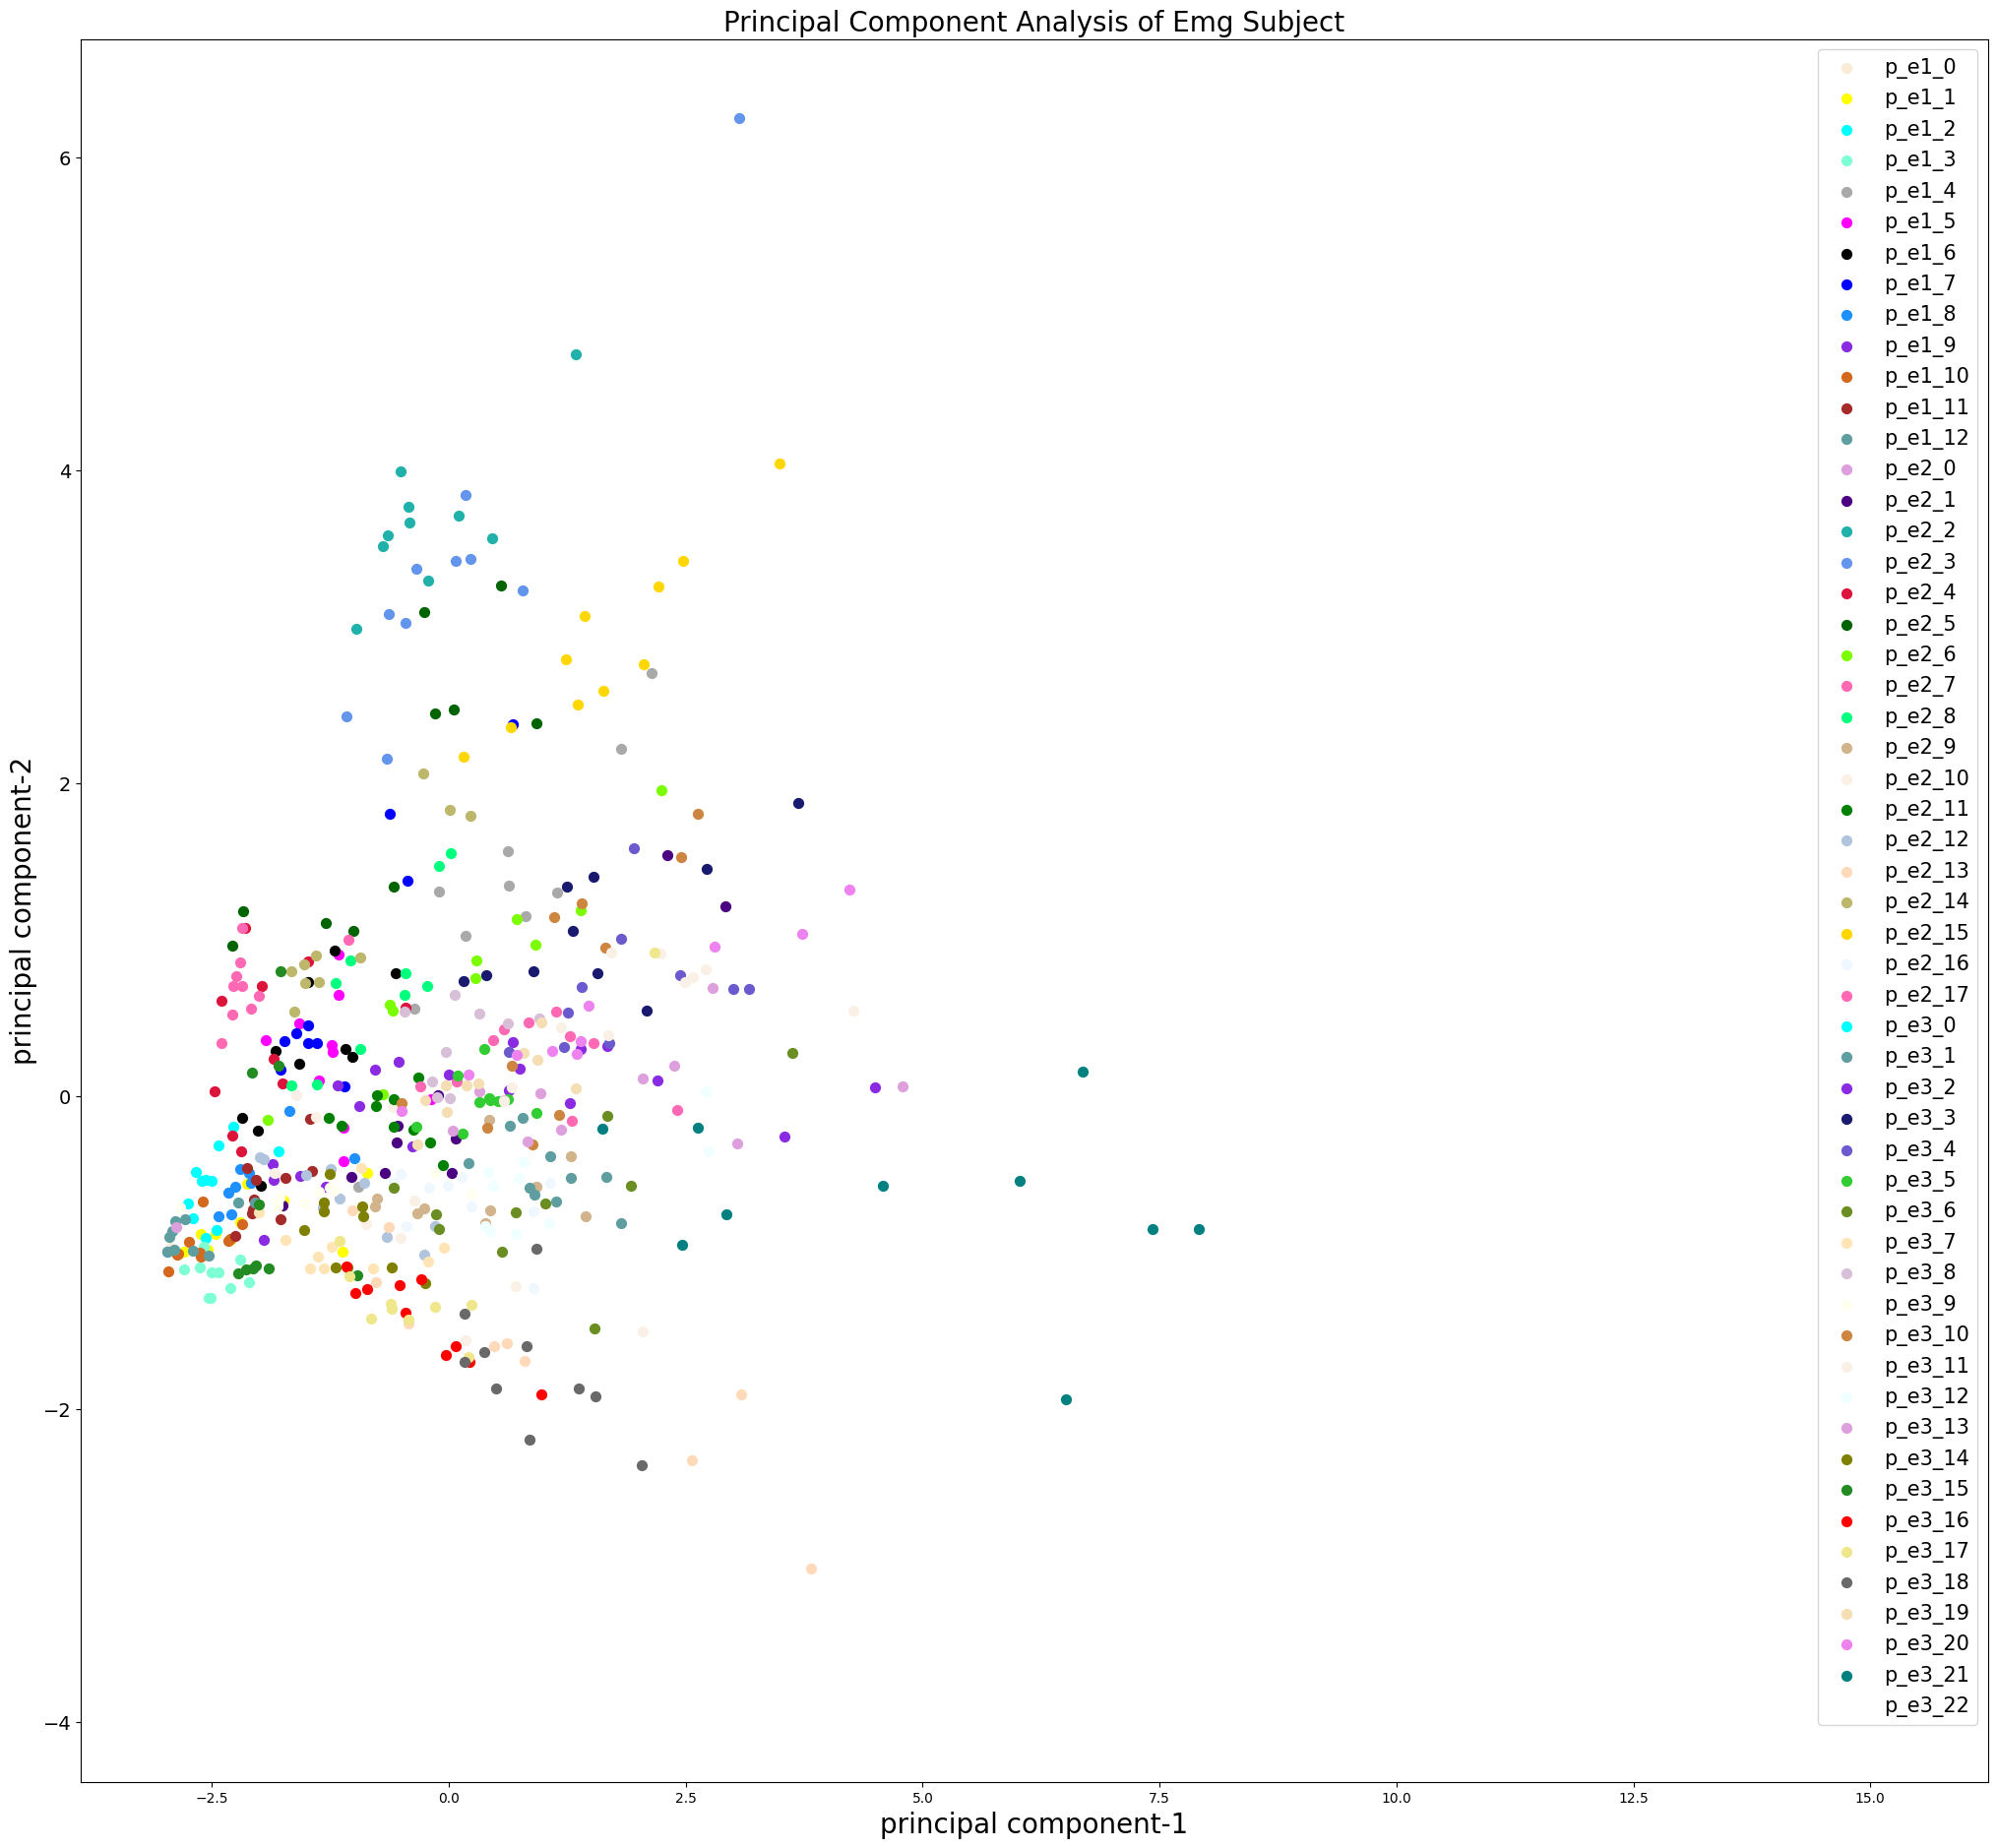

In [ ]:
plt.figure()
plt.figure(figsize= (25, 23))
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.xlabel('principal component-1', fontsize=20)
plt.ylabel('principal component-2', fontsize=20)
plt.title('Principal Component Analysis of Emg Subject', fontsize=20)

targets= ['p_e1_0','p_e1_1','p_e1_2','p_e1_3','p_e1_4','p_e1_5','p_e1_6','p_e1_7',
          'p_e1_8','p_e1_9','p_e1_10','p_e1_11','p_e1_12','p_e2_0','p_e2_1','p_e2_2',
          'p_e2_3','p_e2_4','p_e2_5','p_e2_6','p_e2_7','p_e2_8','p_e2_9','p_e2_10',
          'p_e2_11','p_e2_12','p_e2_13','p_e2_14','p_e2_15','p_e2_16','p_e2_17',
          'p_e3_0','p_e3_1','p_e3_2','p_e3_3','p_e3_4','p_e3_5','p_e3_6','p_e3_7',
          'p_e3_8','p_e3_9','p_e3_10','p_e3_11','p_e3_12','p_e3_13','p_e3_14','p_e3_15',
          'p_e3_16','p_e3_17','p_e3_18','p_e3_19','p_e3_20','p_e3_21','p_e3_22','p_e3_23']

colors= ['antiquewhite','yellow','aqua','aquamarine','darkgrey','magenta','black',
         'blue','dodgerblue','blueviolet','chocolate','brown','cadetblue','plum','indigo',
         'lightseagreen','cornflowerblue','crimson','darkgreen','lawngreen','hotpink',
         'springgreen','tan','linen','green','lightsteelblue','peachpuff','darkkhaki','gold',
         'aliceblue','hotpink','cyan','cadetblue','blueviolet','midnightblue','slateblue',
         'limegreen','olivedrab','moccasin','thistle','ivory','peru','linen','azure','plum',
         'olive','forestgreen','red','khaki','dimgray','wheat','violet','teal','white']

for target, color in zip(targets, colors):
    indicesToKeep = Exe['Stimulus'] == target
    plt.scatter(pca_emg_Df.loc[indicesToKeep, 'PCA 1'],
                pca_emg_Df.loc[indicesToKeep, 'PCA 2'], c= color, s= 50)
plt.legend(targets, prop={'size': 15});

The PCA visualization shows the spread of variability of the electrode signals per each hand movement/posture.
It can be deduced that since the the subject performed several hand movement experiments ranging from ball handling to disc handling the variation should be see in the plot and which is demonstrated in the scatter plot.
However, we can therefore notice some slight overlaps on the movements with dictates to us that the muscle signals for several movement sometimes is similar to one another.

The next case study is to combine this subject data with several of subjects data (27 in total). And determine if there will be variability/spread Wich indicates different muscle signals reading or overlap which indicates the same frequency of muscle readings of different subject/people.